In [1]:
%load_ext autoreload
%autoreload 2

In [80]:
import os
import numpy as np
import json
from dataclasses import dataclass

import torch
import torch.nn.functional as F
from torchvision.utils import save_image
import networkx as nx
from matplotlib import pyplot as plt
import matplotlib.patches as patches
from PIL import Image, ImageDraw
import webcolors

from minimal.imaging import draw_plan
from minimal.layout import LayoutGraph, NodeType, LayoutGraphBuilder, LayoutGraphBuilderNode
from minimal.gen import generate_plan

%matplotlib inline

In [60]:
g = LayoutGraph([4, 2, 2, 3, 1, 0, 16, 16, 16, 16, 16, 14], [(0, 5), (0, 7), (1, 5), (1, 6), (2, 5), (2, 8), (3, 5), (3, 9), (4, 5), (4, 10), (5, 6), (5, 7), (5, 8), (5, 9), (5, 10), (5, 11)])
g1 = LayoutGraph([0, 1, 4, 2, 3, 2, 3, 2, 3, 14, 16, 16, 16, 16, 16, 16, 16, 16], [(0, 9), (0, 1), (0, 3), (0, 5), (0, 7), (0, 10), (0, 11), (0, 12), (0, 13), (1, 10), (2, 7), (2, 14), (3, 4), (3, 11), (3, 15), (4, 15), (5, 6), (5, 12), (5, 16), (6, 16), (7, 8), (7, 13), (7, 14), (7, 17), (8, 17)])
g2 = LayoutGraph([0, 1, 4, 2, 3, 2, 3, 2, 3, 14], [(0, 9), (0, 1), (0, 3), (0, 5), (0, 7), (2, 7), (3, 4), (5, 6), (7, 8)])

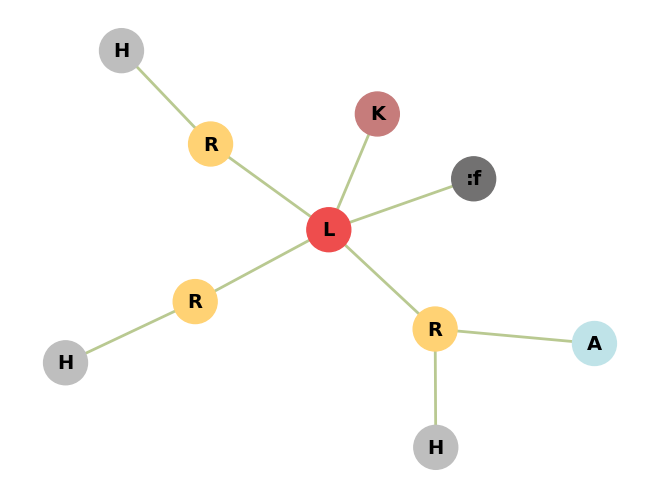

In [61]:
g2.draw()

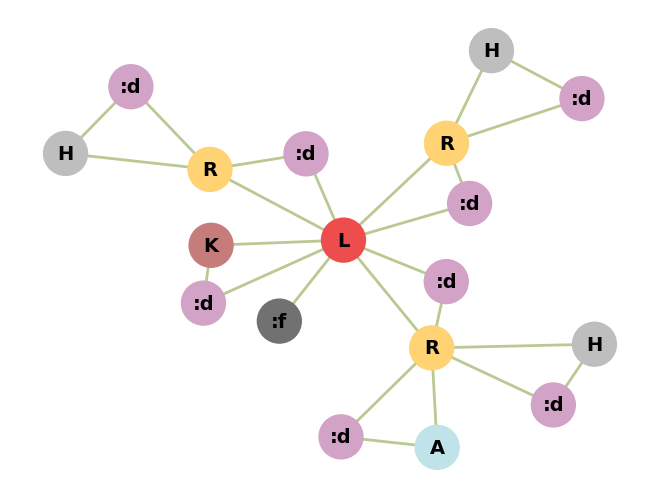

In [63]:
g3 = g2.clone()
g3.ensure_door_connections()
g3.draw()

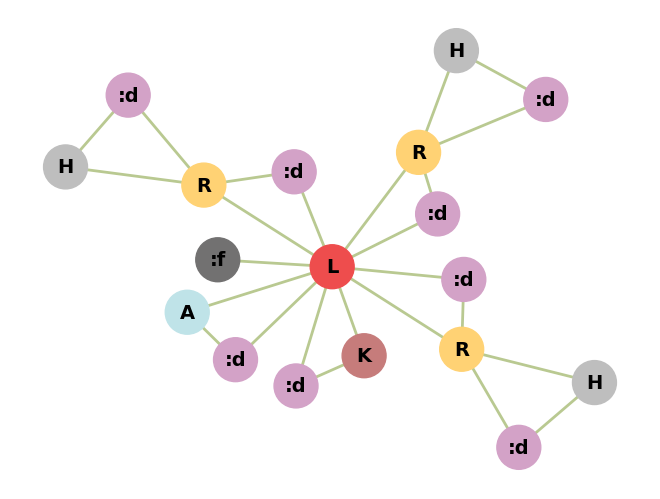

In [85]:
bld = LayoutGraphBuilder()

liv = bld.add_node(NodeType.LIVING_ROOM)
kit = bld.add_node(NodeType.KITCHEN)
bal = bld.add_node(NodeType.BALCONY)
r1 = bld.add_node(NodeType.BEDROOM)
b1 = bld.add_node(NodeType.BATHROOM)
r2 = bld.add_node(NodeType.BEDROOM)
b2 = bld.add_node(NodeType.BATHROOM)
r3 = bld.add_node(NodeType.BEDROOM)
b3 = bld.add_node(NodeType.BATHROOM)
fr = bld.add_node(NodeType.FRONT_DOOR)

bld.add_edge(liv, fr)
bld.add_edge(liv, kit)
bld.add_edge(liv, r1)
bld.add_edge(liv, r2)
bld.add_edge(liv, r3)

bld.add_edge(r1, b1)
bld.add_edge(r2, b2)
bld.add_edge(r3, b3)
bld.add_edge(r3, bal)

g4 = bld.build()
g4.ensure_door_connections()

g4.draw()